In [278]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

In [198]:
os.chdir(r'C:\Users\91938\Desktop\Python')

In [199]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission_iA3afxn.csv')

In [200]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [201]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [202]:
sample.head()

,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0


In [203]:
train.shape

(381109, 12)

In [204]:
test.shape

(127037, 11)

In [205]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [206]:
train['source'] = 'train'
test['source'] = 'test'

### Preprocessing

In [207]:
data = pd.concat([train, test])

In [208]:
data.reindex()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,source
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1.0,train
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0.0,train
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1.0,train
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0.0,train
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56,NaN,test
127033,508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165,NaN,test
127034,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74,NaN,test
127035,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265,NaN,test


In [209]:
data.shape

(508146, 13)

In [210]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,source
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1.0,train
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0.0,train
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1.0,train
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0.0,train
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0.0,train


In [211]:
data.isnull().sum()

id                           0
Gender                       0
Age                          0
Driving_License              0
Region_Code                  0
Previously_Insured           0
Vehicle_Age                  0
Vehicle_Damage               0
Annual_Premium               0
Policy_Sales_Channel         0
Vintage                      0
Response                127037
source                       0
dtype: int64

In [212]:
data['Age'].value_counts()

24    34565
23    32353
22    28058
25    27578
21    21910
      ...  
81       77
82       42
83       32
84       18
85       12
Name: Age, Length: 66, dtype: int64

In [213]:
data['Gender'].value_counts()

Male      274325
Female    233821
Name: Gender, dtype: int64

In [214]:
data['Vehicle_Age'].value_counts()

1-2 Year     267015
< 1 Year     219805
> 2 Years     21326
Name: Vehicle_Age, dtype: int64

In [215]:
data['Driving_License'].value_counts()

1    507097
0      1049
Name: Driving_License, dtype: int64

In [216]:
data['Previously_Insured'].value_counts()

0    275076
1    233070
Name: Previously_Insured, dtype: int64

### using the standard scaling the model gets overfitted

In [144]:
#scale = StandardScaler()

In [145]:
#data_numbers = data.select_dtypes(include = np.number)

In [146]:
#data_numbers.drop(columns = ['Age', 'Driving_License', 'Previously_Insured', 'Response'], inplace = True)

C:\Users\91938\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [147]:
#scaled = scale.fit_transform(data_numbers.drop(columns = 'id'))
#data_numbers = pd.DataFrame(scaled, columns = data_numbers.drop(columns = 'id').columns)

In [217]:
#data_numbers

### One hot encode

In [218]:
one_hot = data.select_dtypes(exclude = np.number)

In [219]:
data_hot = data.select_dtypes(include = np.number)
data_hot.drop(columns = ['id', 'Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response'], inplace = True)

C:\Users\91938\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [220]:
data_hot.head()

,Driving_License,Previously_Insured
0,1,0
1,1,0
2,1,0
3,1,1
4,1,1


In [221]:
one_hot_encode = pd.concat([one_hot, data_hot], axis = 1)
one_hot_encode.drop(columns = 'source', inplace = True)

In [222]:
one_hot_encode.head()

,Gender,Vehicle_Age,Vehicle_Damage,Driving_License,Previously_Insured
0,Male,> 2 Years,Yes,1,0
1,Male,1-2 Year,No,1,0
2,Male,> 2 Years,Yes,1,0
3,Male,< 1 Year,No,1,1
4,Female,< 1 Year,No,1,1


In [223]:
one_hot_encode = pd.get_dummies(one_hot_encode)

In [224]:
one_hot_encode.head()

,Driving_License,Previously_Insured,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes
0,1,0,0,1,0,0,1,0,1
1,1,0,0,1,1,0,0,1,0
2,1,0,0,1,0,0,1,0,1
3,1,1,0,1,0,1,0,1,0
4,1,1,1,0,0,1,0,1,0


In [225]:
#data_numbers = data_numbers.reset_index(drop = True)
one_hot_encode = one_hot_encode.reset_index(drop = True)
data = data.reset_index(drop = True)

In [293]:
data_preprocessed = pd.concat([one_hot_encode, data[['Response', 'source', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'id']]], axis = 1)

In [294]:
data_preprocessed.head()

,Driving_License,Previously_Insured,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes,Response,source,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage,id
0,1,0,0,1,0,0,1,0,1,1.0,train,28.0,40454.0,26.0,217,1
1,1,0,0,1,1,0,0,1,0,0.0,train,3.0,33536.0,26.0,183,2
2,1,0,0,1,0,0,1,0,1,1.0,train,28.0,38294.0,26.0,27,3
3,1,1,0,1,0,1,0,1,0,0.0,train,11.0,28619.0,152.0,203,4
4,1,1,1,0,0,1,0,1,0,0.0,train,41.0,27496.0,152.0,39,5


In [295]:
train_preprocessed = data_preprocessed[data_preprocessed['source']=='train'].drop(columns='source')
test_preprocessed = data_preprocessed[data_preprocessed['source']=='test'].drop(columns=['source', 'Response'])

In [296]:
train_preprocessed.head()

,Driving_License,Previously_Insured,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes,Response,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage,id
0,1,0,0,1,0,0,1,0,1,1.0,28.0,40454.0,26.0,217,1
1,1,0,0,1,1,0,0,1,0,0.0,3.0,33536.0,26.0,183,2
2,1,0,0,1,0,0,1,0,1,1.0,28.0,38294.0,26.0,27,3
3,1,1,0,1,0,1,0,1,0,0.0,11.0,28619.0,152.0,203,4
4,1,1,1,0,0,1,0,1,0,0.0,41.0,27496.0,152.0,39,5


In [297]:
test_preprocessed.head()

,Driving_License,Previously_Insured,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage,id
381109,1,1,0,1,0,1,0,1,0,11.0,35786.0,152.0,53,381110
381110,1,0,0,1,1,0,0,0,1,28.0,33762.0,7.0,111,381111
381111,1,0,0,1,1,0,0,0,1,28.0,40050.0,124.0,199,381112
381112,1,1,0,1,0,1,0,0,1,27.0,37356.0,152.0,187,381113
381113,1,1,0,1,0,1,0,1,0,28.0,59097.0,152.0,297,381114


In [322]:
test_preprocessed.shape

(127037, 14)

In [298]:
x = train_preprocessed.drop(columns = 'id')
y = train_preprocessed['Response']

In [256]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 40)

### Naive Bayes

In [257]:
nb = GaussianNB()

In [258]:
nb.fit(x_train, y_train)

GaussianNB()

In [280]:
train_pred = nb.predict(x_train)
print('Train accuracy :', accuracy_score(y_train, train_pred))
print('Train Roc_acc :', roc_auc_score(y_train, train_pred))

test_pred = nb.predict(x_test)
print('Test accuracy :', accuracy_score(y_test, test_pred))
print('Test Roc_acc :', roc_auc_score(y_test, test_pred))

Train accuracy : 0.9915378391970787
Train Roc_acc : 0.9709302466437424
Test accuracy : 0.9911902075516256
Test Roc_acc : 0.9696105089676726


### KNN

In [260]:
knn = KNeighborsClassifier()

In [261]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [281]:
train_pred = knn.predict(x_train)
print('Train accuracy :', accuracy_score(y_train, train_pred))
print('Train Roc_acc :', roc_auc_score(y_train, train_pred))

test_pred = knn.predict(x_test)
print('Test accuracy :', accuracy_score(y_test, test_pred))
print('Test Roc_acc :', roc_auc_score(y_test, test_pred))

Train accuracy : 0.8888679946646841
Train Roc_acc : 0.5790389998160927
Test accuracy : 0.8648159324079662
Test Roc_acc : 0.5209516969919128


### Logistic Regression

In [263]:
log = LogisticRegression()

In [264]:
log.fit(x_train, y_train)

C:\Users\91938\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [290]:
train_pred = log.predict(x_train)
print('Train accuracy :', accuracy_score(y_train, train_pred))
log_roc_train = print('Train Roc_acc :', roc_auc_score(y_train, train_pred))

test_pred = log.predict(x_test)
print('Test accuracy :', accuracy_score(y_test, test_pred))
log_roc_test = print('Test Roc_acc :', roc_auc_score(y_test, test_pred))

Train accuracy : 0.9907113025605143
Train Roc_acc : 0.9801193226580435
Test accuracy : 0.9904883104615465
Test Roc_acc : 0.9800617766433901


### Decision Tree

In [266]:
decision = DecisionTreeClassifier()

In [267]:
decision.fit(x_train, y_train)

DecisionTreeClassifier()

In [282]:
train_pred = decision.predict(x_train)
print('Train accuracy :', accuracy_score(y_train, train_pred))
print('Train Roc_acc :', roc_auc_score(y_train, train_pred))

test_pred = decision.predict(x_test)
print('Test accuracy :', accuracy_score(y_test, test_pred))
print('Test Roc_acc :', roc_auc_score(y_test, test_pred))

Train accuracy : 1.0
Train Roc_acc : 1.0
Test accuracy : 1.0
Test Roc_acc : 1.0


### Ada boost

In [269]:
ada = AdaBoostClassifier()

In [270]:
ada.fit(x_train, y_train)

AdaBoostClassifier()

In [283]:
train_pred = ada.predict(x_train)
print('Train accuracy :', accuracy_score(y_train, train_pred))
print('Train Roc_acc :', roc_auc_score(y_train, train_pred))

test_pred = ada.predict(x_test)
print('Test accuracy :', accuracy_score(y_test, test_pred))
print('Test Roc_acc :', roc_auc_score(y_test, test_pred))

Train accuracy : 1.0
Train Roc_acc : 1.0
Test accuracy : 1.0
Test Roc_acc : 1.0


### Random forest

In [284]:
ranfor = RandomForestClassifier()

In [285]:
ranfor.fit(x_train, y_train)

RandomForestClassifier()

In [286]:
train_pred = ranfor.predict(x_train)
print('Train accuracy :', accuracy_score(y_train, train_pred))
print('Train Roc_acc :', roc_auc_score(y_train, train_pred))

test_pred = ranfor.predict(x_test)
print('Test accuracy :', accuracy_score(y_test, test_pred))
print('Test Roc_acc :', roc_auc_score(y_test, test_pred))

Train accuracy : 1.0
Train Roc_acc : 1.0
Test accuracy : 1.0
Test Roc_acc : 1.0


## Naive Bayes and Logistic Regression gives better score 99% than any algorithms, KNN also gives better score which is 86% but Decision tree, Random forest and Ada boost algorithms gives 100% where the model overfits so these algoithms are neglected.

In [287]:
def runmodel(model, x_train = x_train, y_train = y_train, x_test = x_test, y_test = y_test):
    print(model)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    print('Train accuracy :', accuracy_score(y_train, train_pred))
    print('Train Roc_acc :', roc_auc_score(y_train, train_pred))
    test_pred = model.predict(x_test)
    print('Test accuracy :', accuracy_score(y_test, test_pred))
    print('Test Roc_acc :', roc_auc_score(y_test, test_pred))
        

### Voting

In [288]:
model1 = GaussianNB()
model2 = KNeighborsClassifier()
model3 = LogisticRegression()
model4 = DecisionTreeClassifier()
model5 = RandomForestClassifier()
model6 = AdaBoostClassifier()
voting = VotingClassifier(estimators = [('NB', model1), ('KNN', model2), ('LR', model3), ('DT', model4), ('RF', model5), ('Ada', model6)], voting = 'hard')

In [289]:
runmodel(voting)

VotingClassifier(estimators=[('NB', GaussianNB()),
                             ('KNN', KNeighborsClassifier()),
                             ('LR', LogisticRegression()),
                             ('DT', DecisionTreeClassifier()),
                             ('RF', RandomForestClassifier()),
                             ('Ada', AdaBoostClassifier())])


C:\Users\91938\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train accuracy : 0.9972230118295323
Train Roc_acc : 0.9886351433582704
Test accuracy : 0.9968316234158117
Test Roc_acc : 0.987135780109732


In [304]:
train_preprocessed.head()

,Driving_License,Previously_Insured,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes,Response,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage,id
0,1,0,0,1,0,0,1,0,1,1.0,28.0,40454.0,26.0,217,1
1,1,0,0,1,1,0,0,1,0,0.0,3.0,33536.0,26.0,183,2
2,1,0,0,1,0,0,1,0,1,1.0,28.0,38294.0,26.0,27,3
3,1,1,0,1,0,1,0,1,0,0.0,11.0,28619.0,152.0,203,4
4,1,1,1,0,0,1,0,1,0,0.0,41.0,27496.0,152.0,39,5


In [339]:
test_pred = log.predict(test_preprocessed)

C:\Users\91938\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- id
Feature names seen at fit time, yet now missing:
- Response

  warnings.warn(message, FutureWarning)


In [340]:
test['Response'] = test_pred

In [341]:
output = test[['id', 'Response']]

In [342]:
output.to_csv("Cross-sell_prediction.csv", index = False)

In [343]:
output.head()

,id,Response
0,381110,0.0
1,381111,0.0
2,381112,0.0
3,381113,0.0
4,381114,0.0


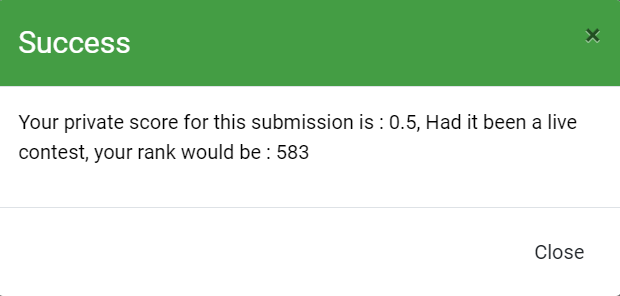